# EDA of US Census and NY BOE Data
Focusing on NY's 23rd Congressional District

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Load US Census Data

Census Data from [data.census.gov](http://data.census.gov)

* Age and Sex Table 
    * American Community Survey (ACS)
    * TableID SO101
* Product 2019 ACS 1-Year Estimates

In [2]:
data_file = 'ACSST1Y2019.S0101_data_with_overlays_2021-01-03T131512.csv'

In [3]:
df = pd.read_csv(data_file)

In [4]:
df

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!5 to 9...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!10 to ...,Margin of Error!!Total!!Total population!!AGE!...,...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...
1,0100000US,United States,328239523,*****,19404835,22314,19690437,69224,21423479,69779,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,5001600US3623,"Congressional District 23 (116th Congress), Ne...",687583,3878,34759,1177,37179,1896,37528,1806,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


Cols of interest
* Total Population
* Population 18 years and over
* Male 18+
* Female 18+

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 458 entries, GEO_ID to S0101_C06_038M
dtypes: object(458)
memory usage: 10.9+ KB


In [6]:
cols_of_interest = ['NAME', 
                    'S0101_C01_001E', 
                    'S0101_C01_026E', 
                    'S0101_C03_001E', 
                    'S0101_C03_026E', 
                    'S0101_C05_001E', 
                    'S0101_C05_026E']

In [7]:
census_df = df[cols_of_interest]

In [8]:
census_df

,NAME,S0101_C01_001E,S0101_C01_026E,S0101_C03_001E,S0101_C03_026E,S0101_C05_001E,S0101_C05_026E
0,Geographic Area Name,Estimate!!Total!!Total population,Estimate!!Total!!Total population!!SELECTED AG...,Estimate!!Male!!Total population,Estimate!!Male!!Total population!!SELECTED AGE...,Estimate!!Female!!Total population,Estimate!!Female!!Total population!!SELECTED A...
1,United States,328239523,255271738,161588973,124267346,166650550,131004392
2,"Congressional District 23 (116th Congress), Ne...",687583,553107,341076,271310,346507,281797


In [9]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NAME            3 non-null      object
 1   S0101_C01_001E  3 non-null      object
 2   S0101_C01_026E  3 non-null      object
 3   S0101_C03_001E  3 non-null      object
 4   S0101_C03_026E  3 non-null      object
 5   S0101_C05_001E  3 non-null      object
 6   S0101_C05_026E  3 non-null      object
dtypes: object(7)
memory usage: 296.0+ bytes


Convert the numerical data from a string to an int

In [10]:
for col in cols_of_interest[1:]:
    census_df.loc[1:, col] = pd.to_numeric(census_df.loc[1:, col])

/Users/freethrall/anaconda3/envs/py3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/freethrall/anaconda3/envs/py3.7/lib/python3.7/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [11]:
total_pops = census_df.iloc[-1:][['S0101_C01_001E', 'S0101_C03_001E', 'S0101_C05_001E']].to_numpy()[0]

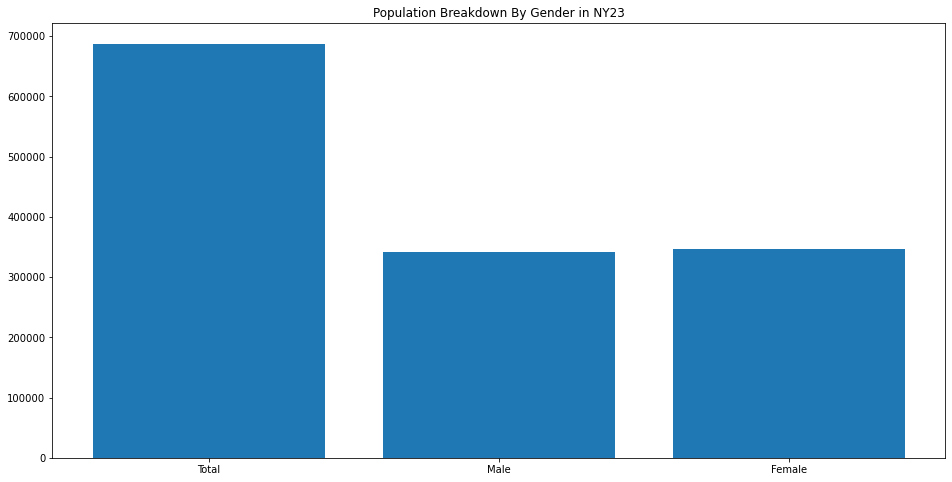

In [12]:
plt.figure(figsize=(16,8))
plt.bar(x=['Total', 'Male', 'Female'],
       height=total_pops)
plt.title('Population Breakdown By Gender in NY23')
plt.show()

In [13]:
voting_age_pops = census_df.iloc[-1:][['S0101_C01_026E', 'S0101_C03_026E', 'S0101_C05_026E']].to_numpy()[0]

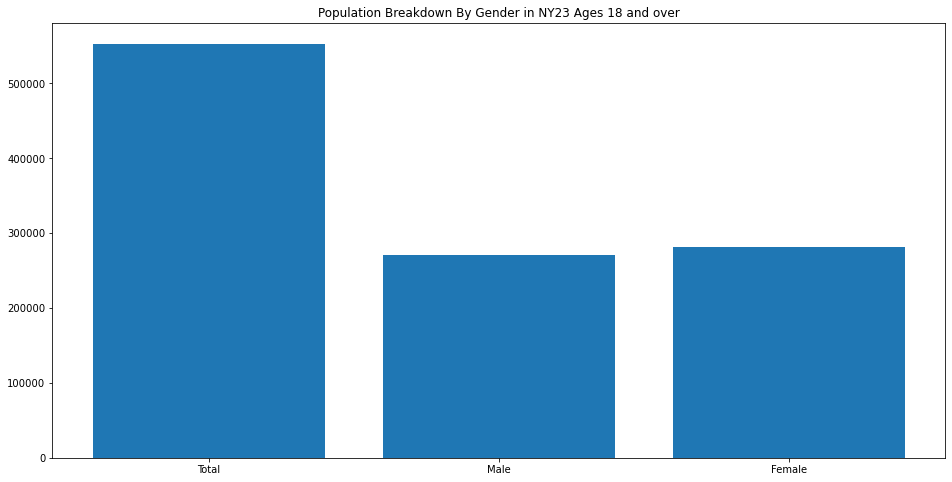

In [14]:
plt.figure(figsize=(16,8))
plt.bar(x=['Total', 'Male', 'Female'],
       height=voting_age_pops)
plt.title('Population Breakdown By Gender in NY23 Ages 18 and over')
plt.show()

The breakdown by gender is fairly even for the entire population and the 18+ group, both with somewhat higher female populations, but it's more even for the entire population, so the under 18 group must have a higher population of males vs. females.

# LOAD NY Board of Education (BOE) Data

Data from New York State BOE [link](https://www.elections.ny.gov/EnrollmentCD.html)

* Enrollment by Congressional District
    * As of 11/1/2020

## Load Data into Dataframe and Clean

In [15]:
boe_data_file = 'congress_nov20.xls'

In [16]:
boe_df = pd.read_excel(boe_data_file, sheet_name='CD Enrollment November 2020')

In [17]:
boe_df.head()

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Suffolk,Active,165334.0,167547.0,11593.0,1915.0,1035.0,951.0,22615.0,25.0,231.0,142236.0,513482.0
2,1.0,Suffolk,Inactive,14768.0,13653.0,1002.0,211.0,132.0,55.0,2359.0,0.0,20.0,12982.0,45182.0
3,1.0,Suffolk,Total,180102.0,181200.0,12595.0,2126.0,1167.0,1006.0,24974.0,25.0,251.0,155218.0,558664.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all the rows that are all NaN

In [18]:
boe_df.dropna(how='all', inplace=True)

In [19]:
boe_df.head()

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
1,1.0,Suffolk,Active,165334.0,167547.0,11593.0,1915.0,1035.0,951.0,22615.0,25.0,231.0,142236.0,513482.0
2,1.0,Suffolk,Inactive,14768.0,13653.0,1002.0,211.0,132.0,55.0,2359.0,0.0,20.0,12982.0,45182.0
3,1.0,Suffolk,Total,180102.0,181200.0,12595.0,2126.0,1167.0,1006.0,24974.0,25.0,251.0,155218.0,558664.0
5,1.0,District Total,Active,165334.0,167547.0,11593.0,1915.0,1035.0,951.0,22615.0,25.0,231.0,142236.0,513482.0
6,1.0,District Total,InActive,14768.0,13653.0,1002.0,211.0,132.0,55.0,2359.0,0.0,20.0,12982.0,45182.0


In [20]:
# Counties in NY 23 Congressional District
counties_23 = ['Chautauqua', 'Cattaraugus', 'Allegany', 'Steuben', 'Ontario', 
               'Yates', 'Seneca', 'Schuyler', 'Tompkins', 'Chemung', 'Tioga']

# NOTE that Ontario and Tioga Counties are only partially in the 23rd
# Ontario is also in the 27th District
# Tioga is also in the 22nd District

The values in the COUNTY column have trailing spaces and they need to be removed to work with the data more easily

In [21]:
boe_df['COUNTY'] = boe_df['COUNTY'].str.strip()

In [22]:
boe_23_df = boe_df[boe_df['DISTRICT'] == 23.0]

In [23]:
boe_23_df

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
377,23.0,Allegany,Active,5681.0,13238.0,448.0,127.0,88.0,72.0,1243.0,1.0,11.0,5288.0,26197.0
378,23.0,Allegany,Inactive,333.0,517.0,24.0,8.0,8.0,6.0,76.0,0.0,3.0,391.0,1366.0
379,23.0,Allegany,Total,6014.0,13755.0,472.0,135.0,96.0,78.0,1319.0,1.0,14.0,5679.0,27563.0
381,23.0,Cattaraugus,Active,13799.0,18915.0,1119.0,224.0,122.0,134.0,2327.0,3.0,26.0,10067.0,46736.0
382,23.0,Cattaraugus,Inactive,835.0,990.0,68.0,25.0,14.0,5.0,143.0,0.0,6.0,840.0,2926.0
383,23.0,Cattaraugus,Total,14634.0,19905.0,1187.0,249.0,136.0,139.0,2470.0,3.0,32.0,10907.0,49662.0
385,23.0,Chautauqua,Active,25038.0,27595.0,1964.0,441.0,162.0,251.0,4614.0,1.0,63.0,19663.0,79792.0
386,23.0,Chautauqua,Inactive,1652.0,1430.0,109.0,33.0,25.0,21.0,333.0,0.0,8.0,1596.0,5207.0
387,23.0,Chautauqua,Total,26690.0,29025.0,2073.0,474.0,187.0,272.0,4947.0,1.0,71.0,21259.0,84999.0
389,23.0,Chemung,Active,15523.0,21207.0,832.0,232.0,118.0,203.0,2996.0,2.0,32.0,11276.0,52421.0


Filter the data for Active voters

In [24]:
boe_23_active_df = boe_23_df[boe_23_df['STATUS'] == 'Active']

In [25]:
boe_23_active_df

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
377,23.0,Allegany,Active,5681.0,13238.0,448.0,127.0,88.0,72.0,1243.0,1.0,11.0,5288.0,26197.0
381,23.0,Cattaraugus,Active,13799.0,18915.0,1119.0,224.0,122.0,134.0,2327.0,3.0,26.0,10067.0,46736.0
385,23.0,Chautauqua,Active,25038.0,27595.0,1964.0,441.0,162.0,251.0,4614.0,1.0,63.0,19663.0,79792.0
389,23.0,Chemung,Active,15523.0,21207.0,832.0,232.0,118.0,203.0,2996.0,2.0,32.0,11276.0,52421.0
393,23.0,Ontario,Active,8780.0,9617.0,548.0,102.0,91.0,101.0,1378.0,0.0,24.0,6973.0,27614.0
397,23.0,Schuyler,Active,3502.0,5038.0,245.0,59.0,59.0,44.0,715.0,3.0,4.0,2828.0,12497.0
401,23.0,Seneca,Active,6237.0,7882.0,441.0,107.0,75.0,72.0,1053.0,1.0,14.0,4514.0,20396.0
405,23.0,Steuben,Active,14376.0,29535.0,996.0,216.0,173.0,182.0,2921.0,1.0,39.0,11663.0,60102.0
409,23.0,Tioga,Active,6416.0,10850.0,367.0,82.0,73.0,116.0,1329.0,0.0,6.0,5397.0,24636.0
413,23.0,Tompkins,Active,32194.0,11087.0,392.0,194.0,319.0,152.0,2134.0,6.0,25.0,12133.0,58636.0


## What counties have more registered Dems vs. Reps

In [26]:
boe_23_active_df[boe_23_active_df['DEM'] > boe_23_active_df['REP']]

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
413,23.0,Tompkins,Active,32194.0,11087.0,392.0,194.0,319.0,152.0,2134.0,6.0,25.0,12133.0,58636.0


Tompkins Country is the only county in the 23rd that has more active Democrats than Republicans

## What counties have more registered Reps vs. Dems

In [27]:
boe_23_active_df[boe_23_active_df['REP'] > boe_23_active_df['DEM']]

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
377,23.0,Allegany,Active,5681.0,13238.0,448.0,127.0,88.0,72.0,1243.0,1.0,11.0,5288.0,26197.0
381,23.0,Cattaraugus,Active,13799.0,18915.0,1119.0,224.0,122.0,134.0,2327.0,3.0,26.0,10067.0,46736.0
385,23.0,Chautauqua,Active,25038.0,27595.0,1964.0,441.0,162.0,251.0,4614.0,1.0,63.0,19663.0,79792.0
389,23.0,Chemung,Active,15523.0,21207.0,832.0,232.0,118.0,203.0,2996.0,2.0,32.0,11276.0,52421.0
393,23.0,Ontario,Active,8780.0,9617.0,548.0,102.0,91.0,101.0,1378.0,0.0,24.0,6973.0,27614.0
397,23.0,Schuyler,Active,3502.0,5038.0,245.0,59.0,59.0,44.0,715.0,3.0,4.0,2828.0,12497.0
401,23.0,Seneca,Active,6237.0,7882.0,441.0,107.0,75.0,72.0,1053.0,1.0,14.0,4514.0,20396.0
405,23.0,Steuben,Active,14376.0,29535.0,996.0,216.0,173.0,182.0,2921.0,1.0,39.0,11663.0,60102.0
409,23.0,Tioga,Active,6416.0,10850.0,367.0,82.0,73.0,116.0,1329.0,0.0,6.0,5397.0,24636.0
417,23.0,Yates,Active,3307.0,6463.0,235.0,52.0,46.0,44.0,682.0,0.0,28.0,2899.0,13756.0


This is all the counties except Tompkins, plus the total for the district

## How do the total number of Democrats and Republicans compare with the total?

In [28]:
total_dem = boe_23_active_df[boe_23_active_df['COUNTY'] == 'District Total']['DEM'].values[0]
total_rep = boe_23_active_df[boe_23_active_df['COUNTY'] == 'District Total']['REP'].values[0]
total_active = boe_23_active_df[boe_23_active_df['COUNTY'] == 'District Total']['TOTAL'].values[0]

In [29]:
total_ind_3rd = total_active - total_dem - total_rep

In [30]:
print(f'The percentage of active Democratic voters in the 23rd is {round(total_dem / total_active, 2)}')

The percentage of active Democratic voters in the 23rd is 0.32


In [31]:
print(f'The percentage of active Replican voters in the 23rd is {round(total_rep / total_active, 2)}')

The percentage of active Replican voters in the 23rd is 0.38


In [32]:
print(f'The percentage of active Independend or 3rd Party voters in the 23rd is {round(total_ind_3rd / total_active, 2)}')

The percentage of active Independend or 3rd Party voters in the 23rd is 0.3


## Visualize the Party breakdown by County

In [33]:
parties = ['DEM', 'REP', 'CON', 'WOR', 'GRE', 'LBT', 'IND', 'SAM', 'OTH', 'BLANK']

<AxesSubplot:title={'center':'Active Voters by Party in each County in NY23, Including Total'}, xlabel='COUNTY'>

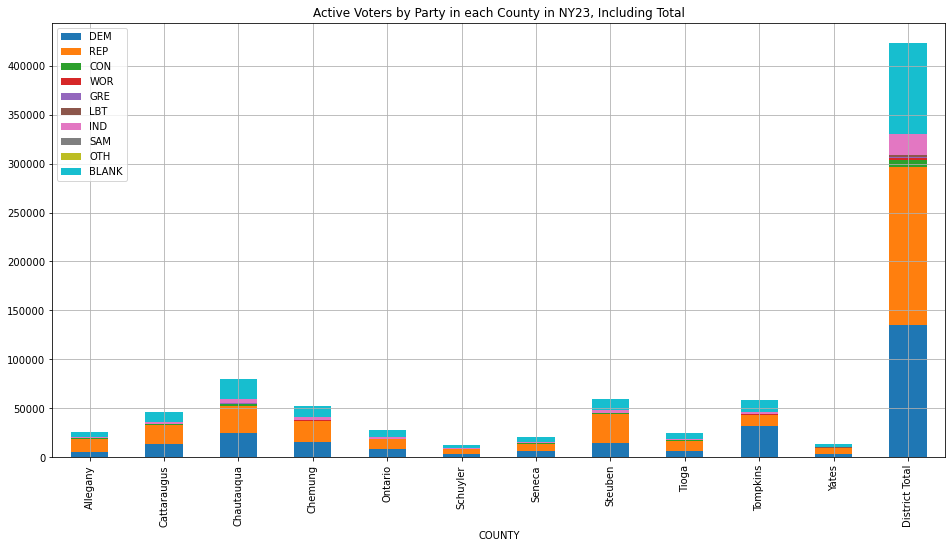

In [34]:
boe_23_active_df.plot.bar(x='COUNTY', 
                          y=parties, 
                          stacked=True, 
                          figsize=(16, 8), 
                          title='Active Voters by Party in each County in NY23, Including Total', 
                          grid=True)

Plot the same data without the District Total

*The District Total is the last row in the dataframe*

<AxesSubplot:title={'center':'Active Voters by Party in each County in NY23'}, xlabel='COUNTY'>

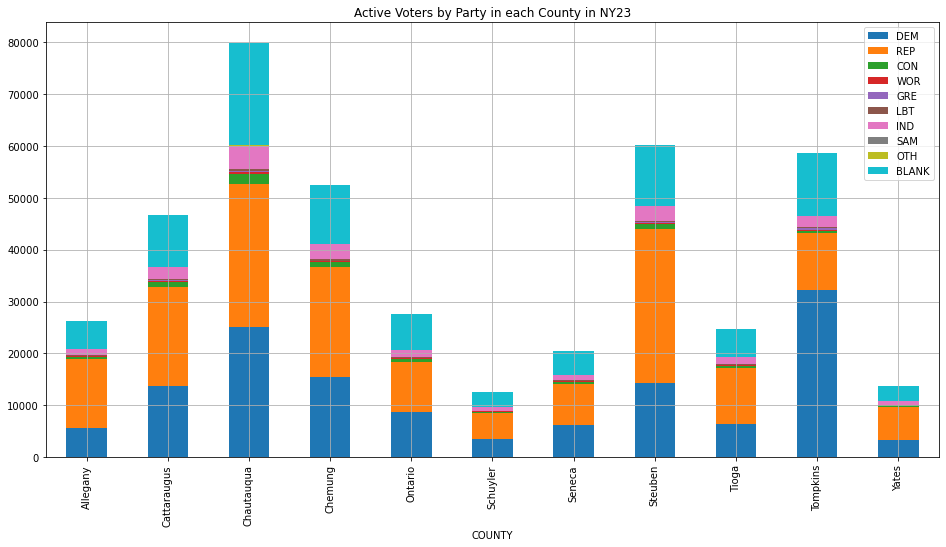

In [35]:
boe_23_active_df.iloc[:-1].plot.bar(x='COUNTY', 
                          y=parties, 
                          stacked=True, 
                          figsize=(16, 8), 
                          title='Active Voters by Party in each County in NY23', 
                          grid=True)

<AxesSubplot:title={'center':'Total Active Voters by Party in NY23'}, ylabel='COUNTY'>

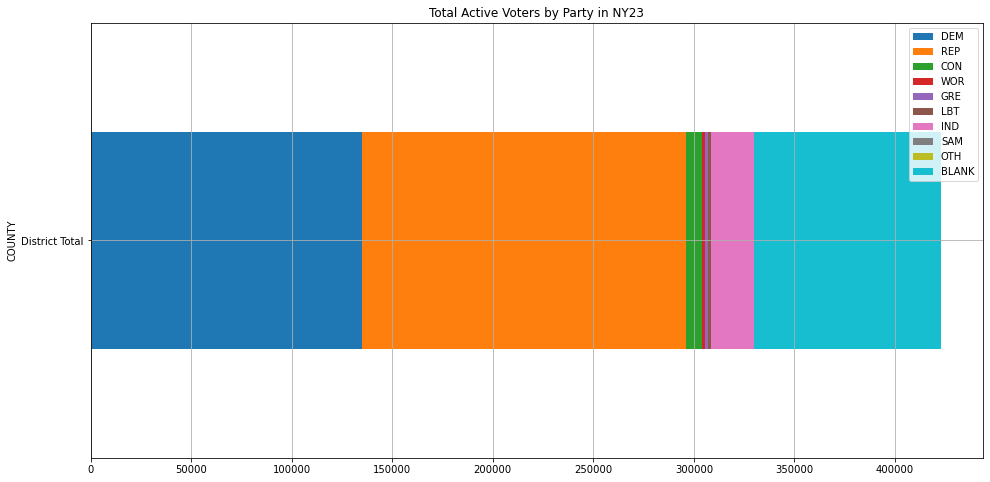

In [36]:
boe_23_active_df.iloc[-1:].plot.barh(x='COUNTY', 
                                     y=parties,
                                     stacked=True, 
                                     figsize=(16, 8), 
                                     title='Total Active Voters by Party in NY23', 
                                     grid=True)

<AxesSubplot:title={'center':'Total Active Voters by Party in NY23'}, ylabel='COUNTY'>

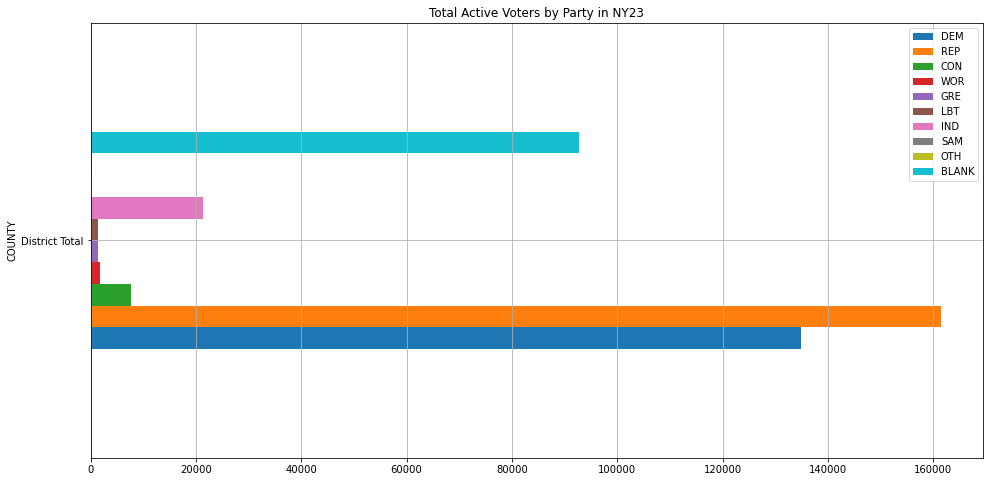

In [37]:
boe_23_active_df.iloc[-1:].plot.barh(x='COUNTY', 
                                     y=parties,
                                     stacked=False, 
                                     figsize=(16, 8), 
                                     title='Total Active Voters by Party in NY23', 
                                     grid=True)

When looking at the district as a whole the party with the greatest amount of registered voters by over 25K is the Republican party, but the amount of people that are not registered to any party far exceeds those 25K.  How are those people going to vote, can it be reasonable predicted from past behavior?

## Look at the turnout for Tompkins County in the Nov 6th Election and compare it to the votes the candidates received along party lines

Data from [Tompkins County BOE](https://tompkinscountyny.gov/node/24475#overlay-context=boe/Additional_Information/Past_Results_files/2020-Results)

Presidential Election (November 3rd, 2020) 
* Representative in Congress
* Turnout

### Quick look at party line votes vs. small parties and non-affiliated voters

In [38]:
tompkins_dem_voted = 26438
tompkins_rep_voted = 8789
tompkins_blank_voted = 8302
tompkins_others_voted = 37543 - tompkins_dem_voted - tompkins_rep_voted

In [39]:
biden = 28979 + 4640
trump = 10240 + 856
other = 46048 - biden - trump

In [40]:
biden

33619

In [41]:
trump

11096

In [42]:
other

1333

If I assume party loyalty, then:

In [43]:
ind_for_biden = biden - tompkins_dem_voted
ind_for_biden

7181

In [44]:
ind_for_trump = trump - tompkins_rep_voted
ind_for_trump

2307

In [45]:
total_ind = ind_for_biden + ind_for_trump
total_ind

9488

9488 exceeds the number of non-affiliated voters, so the smaller parties need to be considered.

### Compare the Turnout and Votes by Party

In [46]:
turnout = ['Turnout', 26438, 8789, 292, 128, 237, 114, 1531, 3, 9, 2, 8302]

#### Compare Congressional Votes by Party Vs. Turnout

In [47]:
tompkins_23_df = pd.DataFrame([['Mitrano', 27450, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # DEM
                            ['Reed', 0, 10569, 0, 0, 0, 0, 0, 0, 0, 0, 0], # REP
                            ['Reed', 0, 0, 829, 0, 0, 0, 0, 0, 0, 0, 0], # CON
                            ['Mitrano', 0, 0, 0, 4995, 0, 0, 0, 0, 0, 0, 0], # WOR
                            ['Kolstee', 0, 0, 0, 0, 0, 493, 0, 0, 0, 0, 0], # LIB
                            ['Reed', 0, 0, 0, 0, 0, 0, 418, 0, 0, 0, 0], # IND
                            turnout],   
                           columns = ['Candidate', 'DEM', 'REP', 'CON', 'WOR', 'GRE', 'LIB', 
                                      'IND', 'SAM', 'WEP', 'REF', 'Non-Aff'])

In [48]:
tompkins_23_df

,Candidate,DEM,REP,CON,WOR,GRE,LIB,IND,SAM,WEP,REF,Non-Aff
0,Mitrano,27450,0,0,0,0,0,0,0,0,0,0
1,Reed,0,10569,0,0,0,0,0,0,0,0,0
2,Reed,0,0,829,0,0,0,0,0,0,0,0
3,Mitrano,0,0,0,4995,0,0,0,0,0,0,0
4,Kolstee,0,0,0,0,0,493,0,0,0,0,0
5,Reed,0,0,0,0,0,0,418,0,0,0,0
6,Turnout,26438,8789,292,128,237,114,1531,3,9,2,8302


In [49]:
tompkins_23_df = tompkins_23_df.groupby('Candidate').sum().reset_index()

In [50]:
tompkins_23_df

,Candidate,DEM,REP,CON,WOR,GRE,LIB,IND,SAM,WEP,REF,Non-Aff
0,Kolstee,0,0,0,0,0,493,0,0,0,0,0
1,Mitrano,27450,0,0,4995,0,0,0,0,0,0,0
2,Reed,0,10569,829,0,0,0,418,0,0,0,0
3,Turnout,26438,8789,292,128,237,114,1531,3,9,2,8302


By looking at the party line votes vs turnout, we can confirm that people don't exclusively vote for the candidate in that party they are registered for because when looking at the smaller parties, the number of votes does not match the turnout.

In [51]:
# Add a column with the total for each row
tompkins_23_df.loc[:,'Row_Total'] = tompkins_23_df.sum(numeric_only=True, axis=1)

In [52]:
tompkins_23_df

,Candidate,DEM,REP,CON,WOR,GRE,LIB,IND,SAM,WEP,REF,Non-Aff,Row_Total
0,Kolstee,0,0,0,0,0,493,0,0,0,0,0,493
1,Mitrano,27450,0,0,4995,0,0,0,0,0,0,0,32445
2,Reed,0,10569,829,0,0,0,418,0,0,0,0,11816
3,Turnout,26438,8789,292,128,237,114,1531,3,9,2,8302,45845


In [53]:
tompkins_parties = ['DEM', 'REP', 'CON', 'WOR', 'GRE', 'LIB', 'IND', 'SAM', 'WEP', 'REF', 'Non-Aff']

<AxesSubplot:title={'center':'Votes By Party in NY23 for Congressional Rep.'}, xlabel='Candidate'>

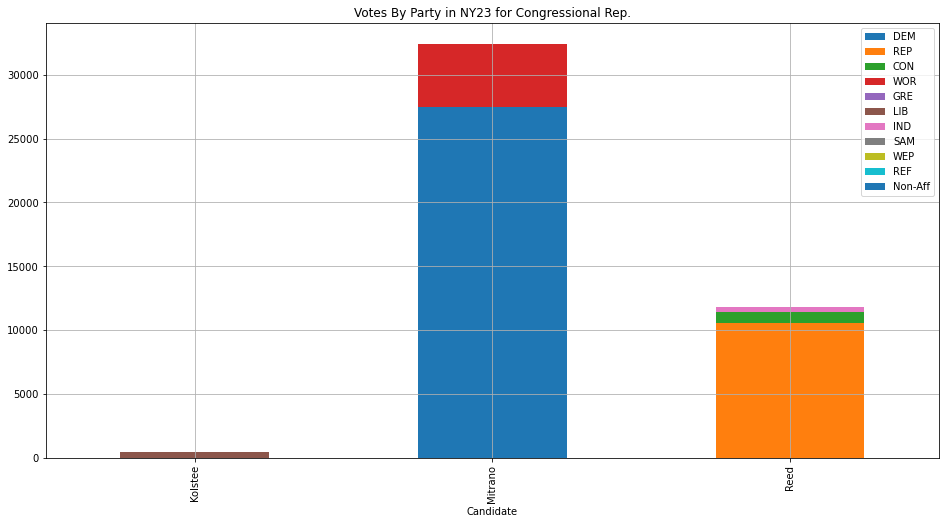

In [54]:
# Visualize the vote breakdown by party without the totals column
tompkins_23_df.iloc[:-1].plot.bar(x='Candidate', 
                        y=tompkins_parties,
                        stacked=True,
                        figsize=(16, 8), 
                        title='Votes By Party in NY23 for Congressional Rep.', 
                        grid=True)

In [55]:
tompkins_23_df_trans = tompkins_23_df.T
tompkins_23_df_trans.columns = tompkins_23_df_trans.iloc[0]
tompkins_23_df_trans.drop(tompkins_23_df_trans.index[0], inplace=True)
tompkins_23_df_trans.drop(tompkins_23_df_trans.index[-1], inplace=True)
tompkins_23_df_trans.rename(index={'Candidate': 'Party'}, inplace=True)
for col in tompkins_23_df_trans.columns:
    tompkins_23_df_trans[col] = pd.to_numeric(tompkins_23_df_trans[col])
tompkins_23_df_trans

Candidate,Kolstee,Mitrano,Reed,Turnout
DEM,0,27450,0,26438
REP,0,0,10569,8789
CON,0,0,829,292
WOR,0,4995,0,128
GRE,0,0,0,237
LIB,493,0,0,114
IND,0,0,418,1531
SAM,0,0,0,3
WEP,0,0,0,9
REF,0,0,0,2


<AxesSubplot:title={'center':'Votes By Party in NY23 for Congressional Rep.'}>

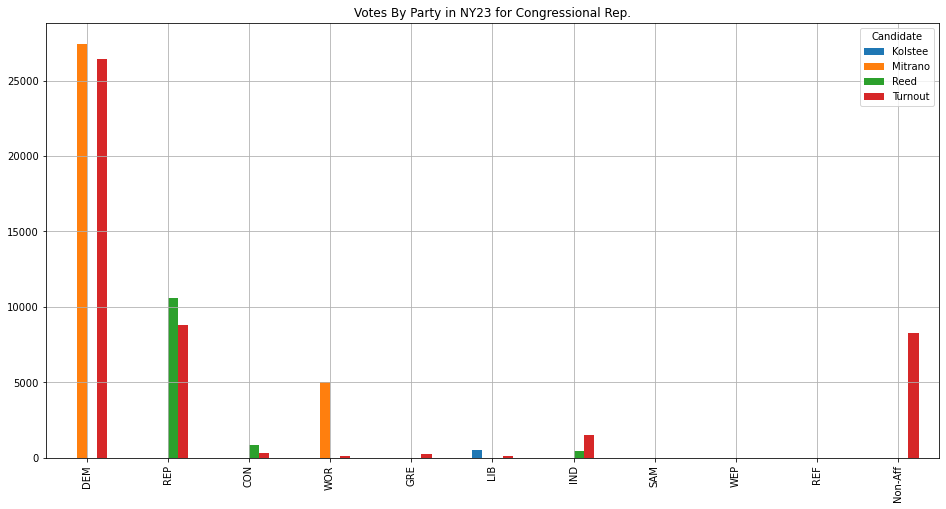

In [56]:
tompkins_23_df_trans.plot.bar( 
                        
                        stacked=False,
                        figsize=(16, 8), 
                        title='Votes By Party in NY23 for Congressional Rep.', 
                        grid=True)

How should we expect the Non-Aff voters to vote?

Parties with excess votes:
* DEM
* REP
* CON
* WOR
* LIB

Parties with fewer votes:
* GRE
* IND

Anecdotally I know
* DEM's will vote on the WOR party line to keep it on the NYS ballot, presumably that is also true for REP's voting on the CON line
* Some people are signed up for the IND party thinking they are Non-Aff because of a confusion over the party name *Independence* vs. just *independent* (non-aff)

Some portion of the Non-Aff voters' votes went to each of the parties with excess votes.  Some portion of those same parties voters' votes could have gone to other party's candidates or party line with the same candidate.

I'll first add a vote difference column to the dataframe

In [57]:
tompkins_23_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, DEM to Non-Aff
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Kolstee  11 non-null     int64
 1   Mitrano  11 non-null     int64
 2   Reed     11 non-null     int64
 3   Turnout  11 non-null     int64
dtypes: int64(4)
memory usage: 440.0+ bytes


In [58]:
tompkins_23_df_trans['vote_dif'] = tompkins_23_df_trans.apply(lambda x: x['Kolstee'] + x['Mitrano'] + x['Reed'] - x['Turnout'], axis=1)

In [59]:
tompkins_23_df_trans

Candidate,Kolstee,Mitrano,Reed,Turnout,vote_dif
DEM,0,27450,0,26438,1012
REP,0,0,10569,8789,1780
CON,0,0,829,292,537
WOR,0,4995,0,128,4867
GRE,0,0,0,237,-237
LIB,493,0,0,114,379
IND,0,0,418,1531,-1113
SAM,0,0,0,3,-3
WEP,0,0,0,9,-9
REF,0,0,0,2,-2


#### Compare Presidential Votes by Party Vs. Turnout

In [60]:
# put the data in a dataframe
tompkins_pres_df = pd.DataFrame([['Biden', 28979, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            ['Trump', 0, 10240, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            ['Trump', 0, 0, 856, 0, 0, 0, 0, 0, 0, 0, 0],
                            ['Biden', 0, 0, 0, 4640, 0, 0, 0, 0, 0, 0, 0],
                            ['Hawkins', 0, 0, 0, 0, 365, 0, 0, 0, 0, 0, 0],
                            ['Jorgensen', 0, 0, 0, 0, 0, 474, 0, 0, 0, 0, 0],
                            ['Pierce', 0, 0, 0, 0, 0, 0, 137, 0, 0, 0, 0],
                            turnout],   
                           columns = ['Candidate', 'DEM', 'REP', 'CON', 'WOR', 'GRE', 'LIB', 
                                      'IND', 'SAM', 'WEP', 'REF', 'Non-Aff'])

In [61]:
tompkins_pres_df

,Candidate,DEM,REP,CON,WOR,GRE,LIB,IND,SAM,WEP,REF,Non-Aff
0,Biden,28979,0,0,0,0,0,0,0,0,0,0
1,Trump,0,10240,0,0,0,0,0,0,0,0,0
2,Trump,0,0,856,0,0,0,0,0,0,0,0
3,Biden,0,0,0,4640,0,0,0,0,0,0,0
4,Hawkins,0,0,0,0,365,0,0,0,0,0,0
5,Jorgensen,0,0,0,0,0,474,0,0,0,0,0
6,Pierce,0,0,0,0,0,0,137,0,0,0,0
7,Turnout,26438,8789,292,128,237,114,1531,3,9,2,8302


Note that there is a difference in the number of votes vs. turnout because some ballets were blank or void

In [62]:
tompkins_pres_df = tompkins_pres_df.groupby('Candidate').sum().reset_index()

In [63]:
tompkins_pres_df

,Candidate,DEM,REP,CON,WOR,GRE,LIB,IND,SAM,WEP,REF,Non-Aff
0,Biden,28979,0,0,4640,0,0,0,0,0,0,0
1,Hawkins,0,0,0,0,365,0,0,0,0,0,0
2,Jorgensen,0,0,0,0,0,474,0,0,0,0,0
3,Pierce,0,0,0,0,0,0,137,0,0,0,0
4,Trump,0,10240,856,0,0,0,0,0,0,0,0
5,Turnout,26438,8789,292,128,237,114,1531,3,9,2,8302
